## XOR problem Practice

In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [8]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

In [9]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = torch.FloatTensor([[0], [1], [1], [0]])

 

![image.png](https://www.researchgate.net/profile/Adem-Tekerek-2/publication/335903047/figure/fig1/AS:805611931443200@1569084260672/Proposed-artificial-neural-network-model-3-10-1-Neural-network-weight-vectors-are.png)
각 층에 존재하는 한 단위의 인공뉴런을 node라고 부릅니다.

매개변수인 가중치(weight)에 행렬곱을 하고, bias를 더해줍니다. 

가중치는 입력 신호가 출력에 주는 영향을 계산하는 매개변수이고, 편향은 각 노드가 얼마나 데이터에 민감한지를 알려주는 매개변수 입니다.

이 행렬곱의 결과는 활성화 함수(activation fuction)을 거쳐 인공뉴련의 결과값을 산출하게 됩니다. 

활성화 함수는 입력에 적절한 처리를 해서 출력 신호로 변환하는 함수 입니다. 활성화 함수는 입력 신호의 합이 활성화를 일으키는지 아닌지를 정하는 역할을 합니다. 

hiddenlayer를 이 과정을 반복합니다.

우리는 인공신경망의 outputlayer의 결과값과 정답을 비교해 오차를 계산해야 합니다. 

이 오차를 기반으로 신경망 전체를 학습시키려면 출력층의 가중치부터 입력층의 가중치까지 모두 gradient decent method를 활용해 변경해줘야 합니다. 

이 작업을 최적화하는 알고리즘이 그 유명한 역전파 backpropagation 알고리즘입니다.

커다란 인공신경망을 만들기 전에 우선, 가장 간단한 하나의 퍼셉트론만을 구현하고 이를 이용하여 문제를 해결해보겠습니다.

![image](https://miro.medium.com/max/1400/1*BMSfafFNEpqGFCNU4smPkg.png)

퍼셉트론이 처음 소개되었을 때 활성화 함수는 계단 함수였지만, 우리는 이미 또 다른 활성화 함수인 시그모이드 함수를 알고 있으므로 시그모이드 함수를 사용해보겠습니다.

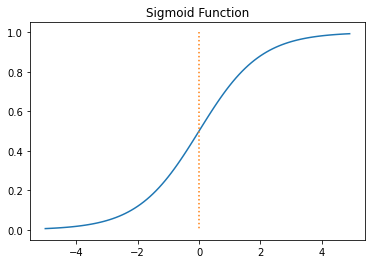

In [10]:
# 시그모이드 함수 그래프를 그리는 코드
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
# plt.axhline(y=0.5, color='r', linewidth=1)
plt.title('Sigmoid Function')
plt.show()

사실 Sigmoid 외에도 수많은 활성화 함수들이 존재합니다.

![image](https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/60be4975a399c635d06ea853_hero_image_activation_func_dark.png)

pytorch는 퍼셉트론과 레이어를 손쉽게 쌓을 수 있게 해줍니다.

In [11]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(2, 1, bias=True)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        return x

In [12]:
model = Net()
criterion = torch.nn.BCELoss().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr=1.0)

In [15]:
for step in range(10001): 
    optimizer.zero_grad()
    hypothesis = model(X)

    # 비용 함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 100 == 0:
        print(step, cost.item())

0 0.6931471824645996
100 0.6931471824645996
200 0.6931471824645996
300 0.6931471824645996
400 0.6931471824645996
500 0.6931471824645996
600 0.6931471824645996
700 0.6931471824645996
800 0.6931471824645996
900 0.6931471824645996
1000 0.6931471824645996
1100 0.6931471824645996
1200 0.6931471824645996
1300 0.6931471824645996
1400 0.6931471824645996
1500 0.6931471824645996
1600 0.6931471824645996
1700 0.6931471824645996
1800 0.6931471824645996
1900 0.6931471824645996
2000 0.6931471824645996
2100 0.6931471824645996
2200 0.6931471824645996
2300 0.6931471824645996
2400 0.6931471824645996
2500 0.6931471824645996
2600 0.6931471824645996
2700 0.6931471824645996
2800 0.6931471824645996
2900 0.6931471824645996
3000 0.6931471824645996
3100 0.6931471824645996
3200 0.6931471824645996
3300 0.6931471824645996
3400 0.6931471824645996
3500 0.6931471824645996
3600 0.6931471824645996
3700 0.6931471824645996
3800 0.6931471824645996
3900 0.6931471824645996
4000 0.6931471824645996
4100 0.6931471824645996
4200

In [14]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.numpy())
    print('모델의 예측값(Predicted): ', predicted.numpy())
    print('실제값(Y): ', Y.numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[0.5]
 [0.5]
 [0.5]
 [0.5]]
모델의 예측값(Predicted):  [[0.]
 [0.]
 [0.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  0.5


제대로 예측이 안되는 것을 볼 수 있습니다.

XOR문제는 하나의 퍼셉트론(하나의 레이어)로는 풀 수 없는 문제입니다.

하나의 퍼셉트론(하나의 레이어)로는 단순 선형문제만을 풀 수 있을 뿐입니다.

![image2](https://miro.medium.com/max/1400/1*Tc8UgR_fjI_h0p3y4H9MwA.png)

두개 이상의 layer가 존재할 때, XOR문제는 해결될 수 있습니다.

# Practice
### 위 코드에서 hidden layer를 추가하여 XOR문제를 해결해 봅시다.